In [1]:
from os import getenv
from pathlib import Path

input_folder = Path(getenv(
    'CROSSCOMPUTE_INPUT_FOLDER', 'tests/standard/input'))
output_folder = Path(getenv(
    'CROSSCOMPUTE_OUTPUT_FOLDER', 'tests/standard/output'))

output_folder.mkdir(parents=True, exist_ok=True)

In [2]:
import csv

def extract_data(csv_path, series_code, value_column):
    data = {}
    
    with open(csv_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            country_code = row['Country Code']
            current_series_code = row['Series Code']
            # print(row[value_column])
            value = str(row[value_column])
            
            try:
                value = float(value)
            except ValueError:
                value = 0
            
            if current_series_code == series_code:
                data[country_code] = value

    return data

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import json

csv_path = 'wb_data.csv'
series_code = 'SP.DYN.TFRT.IN'
value_column = '2015 [YR2015]'

# Mock data
mock_data = extract_data(csv_path, series_code, value_column)

# print(mock_data)

Colored map saved as 'tests/standard/output/colored_map.png'.


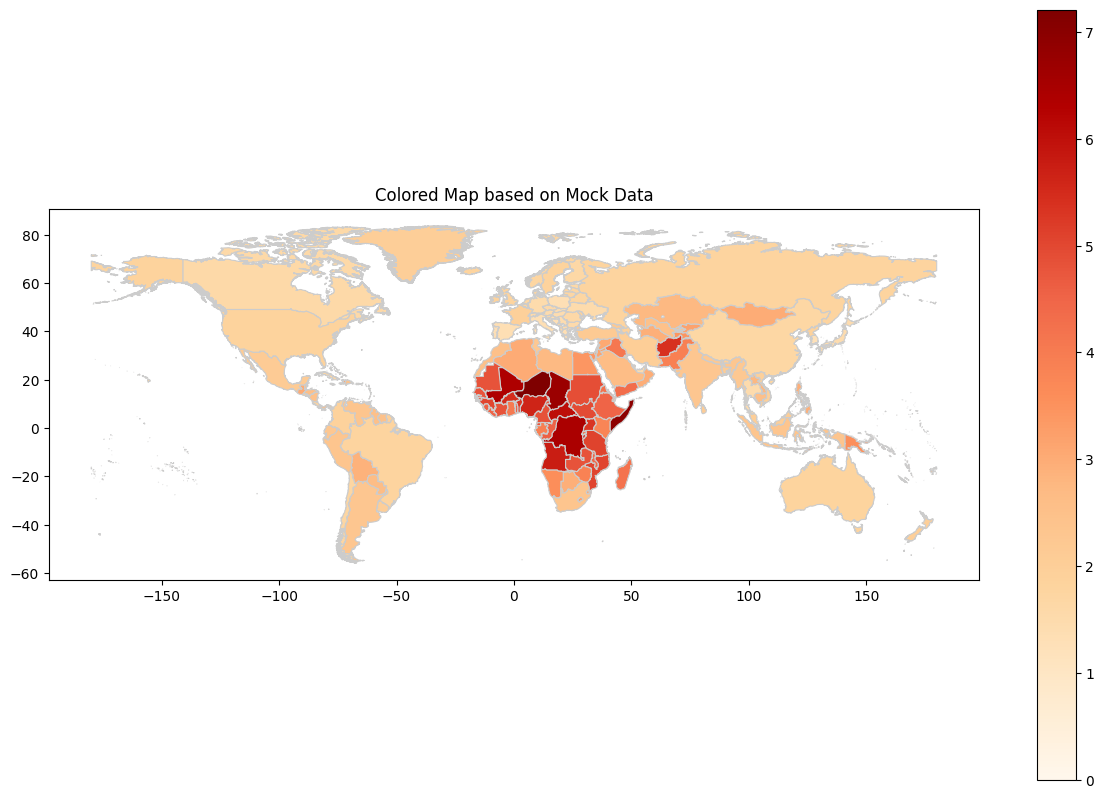

In [4]:

# GeoJSON file with accurate country boundaries
geojson_url = 'https://github.com/datasets/geo-countries/raw/master/data/countries.geojson'

# Load GeoJSON file with geopandas
world_gdf = gpd.read_file(geojson_url)

# Merge with the mock data
merged_gdf = world_gdf.merge(
    gpd.GeoDataFrame({'ISO_A3': list(mock_data.keys()), 'value': list(mock_data.values())}),
    on='ISO_A3'
)

# Plot the map with color based on the 'value' column
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title
plt.title('Colored Map based on Mock Data')

# Save the plot as an image
output_image_path = output_folder /'colored_map.png'
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')

# Show the plot
# plt.show()

print(f"Colored map saved as '{output_image_path}'.")
